In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")


## data information
Country
Year:                   Years from 2000 to 2015
Status:                 Developed or Developing status
Life expectancy:        Life Expectancy in age
Adult Mortality:        Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)
infant deaths:          Number of Infant (Between 0 and 2 years) Deaths  per 1000 population
Alcohol:Alcohol         recorded per capita (15+) consumption (in litres of pure alcohol)
percentage expenditure: Expenditure on health as a percentage of Gross Domestic Product per capita(%)
Hepatitis B:            (HepB) immunization coverage among 1-year-olds (%)
Measles:                number of reported cases per 1000 population
BMI:                    Average Body Mass Index of entire population (weight in kg/(height in m)^2 )
under-five deaths:      Number of under-five deaths per 1000 population
Polio:                  Polio (Pol3) immunization coverage among 1-year-olds (%)
Total expenditure:      General government expenditure on health as a percentage of total government expenditure (%)
Diphtheria:             Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)
HIV/AIDS:               Deaths per 1 000 live births HIV/AIDS (0-4 years)
GDP:                    Gross Domestic Product per capita (in USD)
Population:             Population of the country
thinness 1-19 years:    Prevalence of thinness among children and adolescents for Age 10 to 19 (% )
thinness 5-9 years:     Prevalence of thinness among children for Age 5 to 9(%)
Income composition of resources:  Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
Schooling:              Number of years of Schooling(years)
Immunization columns:   Polio,Diphtheria,Hepatitis B

In [17]:
# ----------------------------------- Read Life Expectancy Data ----------------------------------------------
df=pd.read_csv('Life Expectancy Data.csv')
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


# Data Cleaning
1. Using the mean value to replace the missing data

In [ ]:
# ------------------------------- Data cleaning --------------------------------------------------------
df.rename(columns=lambda x: x.replace(' ', ''), inplace=True)
missing_values_percentage = df.isnull().sum() / len(df) * 100
missing_values_percentage

In [19]:
df.duplicated().sum()

0

In [20]:
from sklearn.model_selection import train_test_split
df_train,df_test=train_test_split(df,test_size=0.2,random_state=42)

In [28]:
num_col=[]
cat_col=[]
for col in df_train.columns:
    if df_train[col].dtype=='object':
        cat_col.append(col)
    else:
        num_col.append(col)
print(cat_col)
print(num_col)


['Country', 'Status']
['Year', 'Lifeexpectancy', 'AdultMortality', 'infantdeaths', 'Alcohol', 'percentageexpenditure', 'HepatitisB', 'Measles', 'BMI', 'under-fivedeaths', 'Polio', 'Totalexpenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness1-19years', 'thinness5-9years', 'Incomecompositionofresources', 'Schooling']


Country                           0
Year                              0
Status                            0
Lifeexpectancy                    8
AdultMortality                    8
infantdeaths                      0
Alcohol                         158
percentageexpenditure             0
HepatitisB                      439
Measles                           0
BMI                              27
under-fivedeaths                  0
Polio                            14
Totalexpenditure                185
Diphtheria                       14
HIV/AIDS                          0
GDP                             345
Population                      516
thinness1-19years                27
thinness5-9years                 27
Incomecompositionofresources    131
Schooling                       129
dtype: int64

<Axes: xlabel='Lifeexpectancy'>

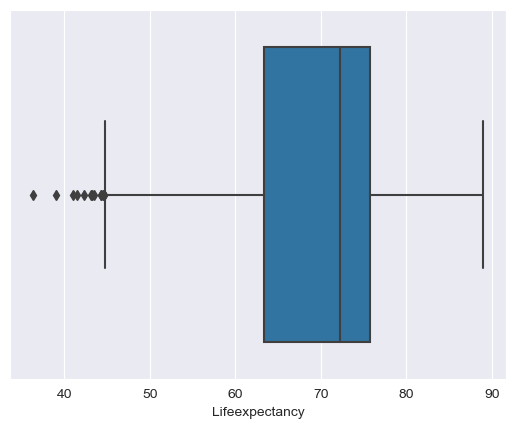

In [22]:
sns.boxplot(data=df_train,x='Lifeexpectancy',fliersize=5)

<Axes: xlabel='Lifeexpectancy', ylabel='Count'>

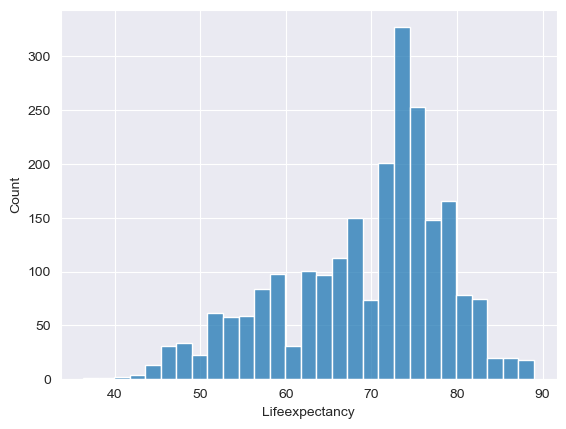

In [23]:
sns.histplot(data=df_train,x='Lifeexpectancy')

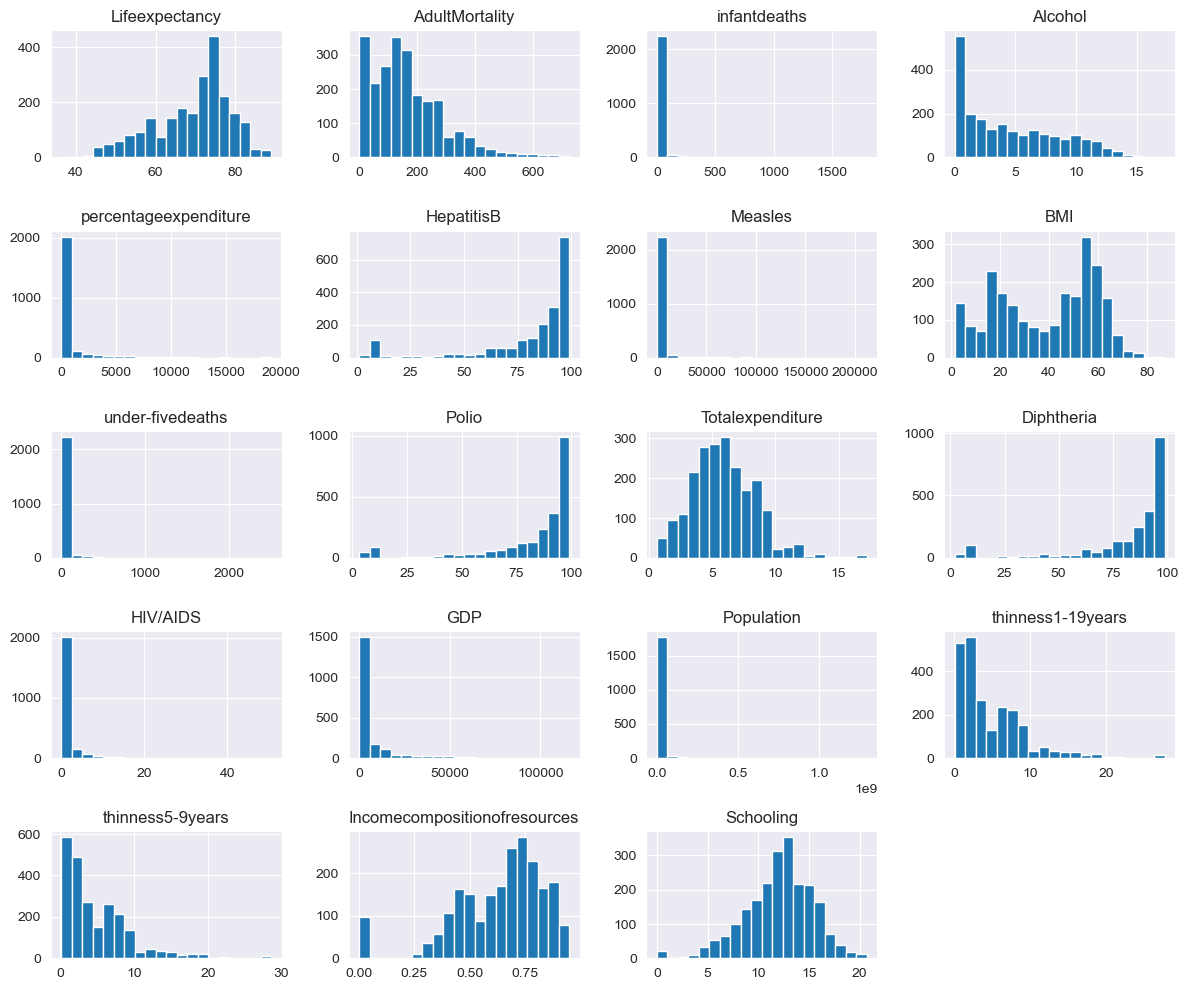

In [24]:
df_train[num_col].drop(columns='Year').hist(bins=20,figsize=(12,10))
plt.tight_layout()
plt.show()

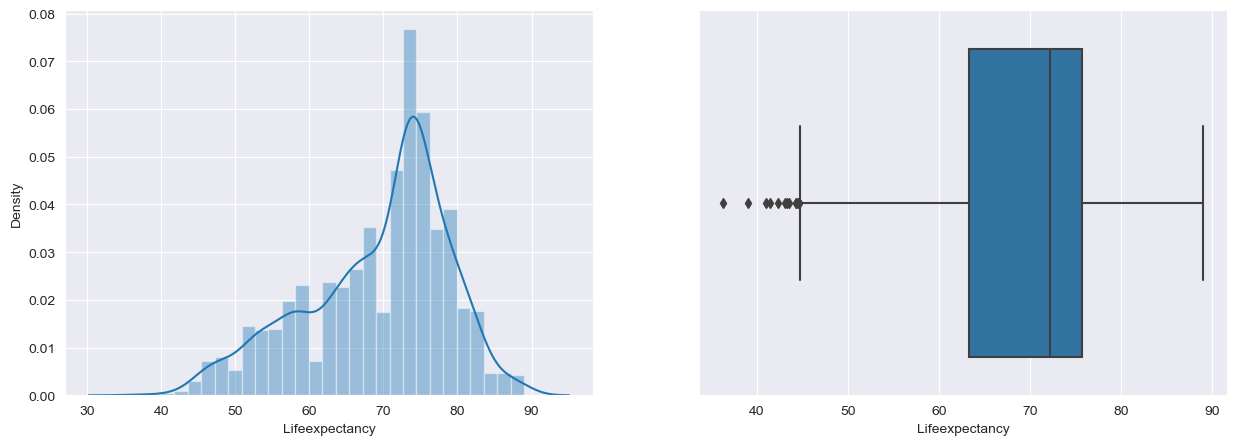

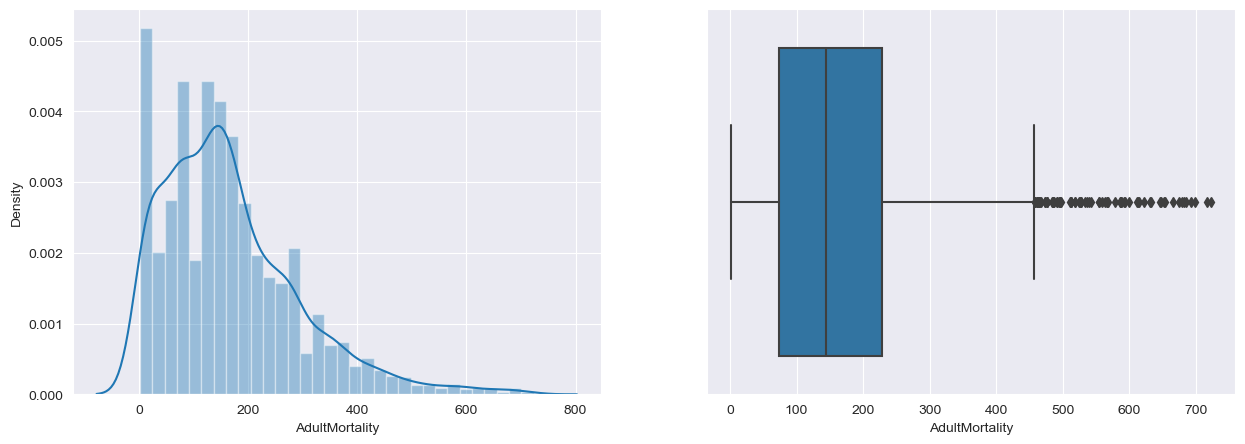

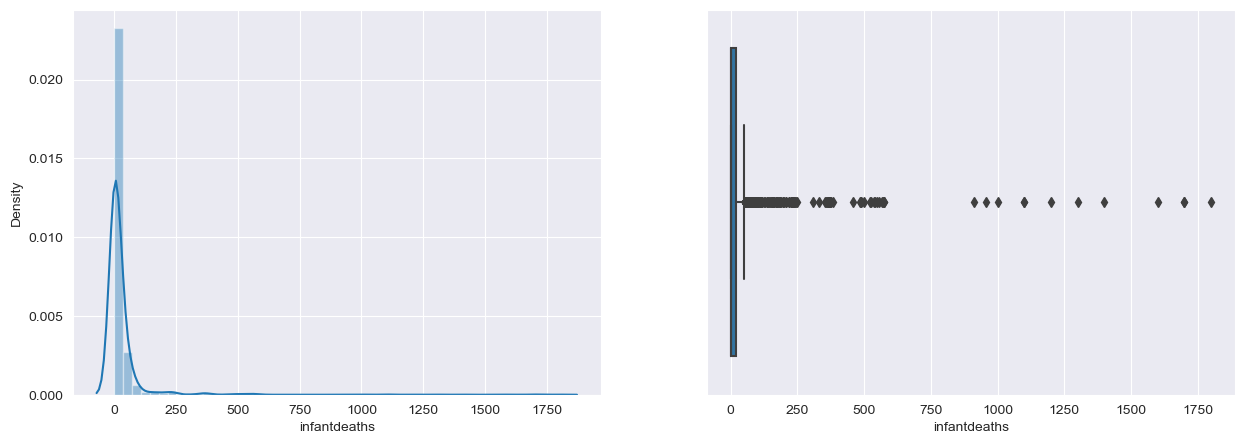

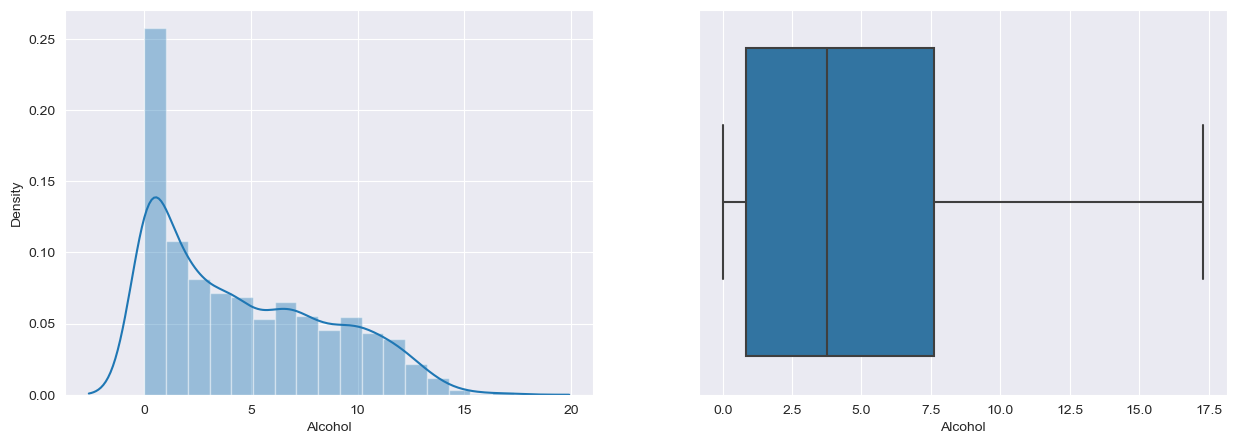

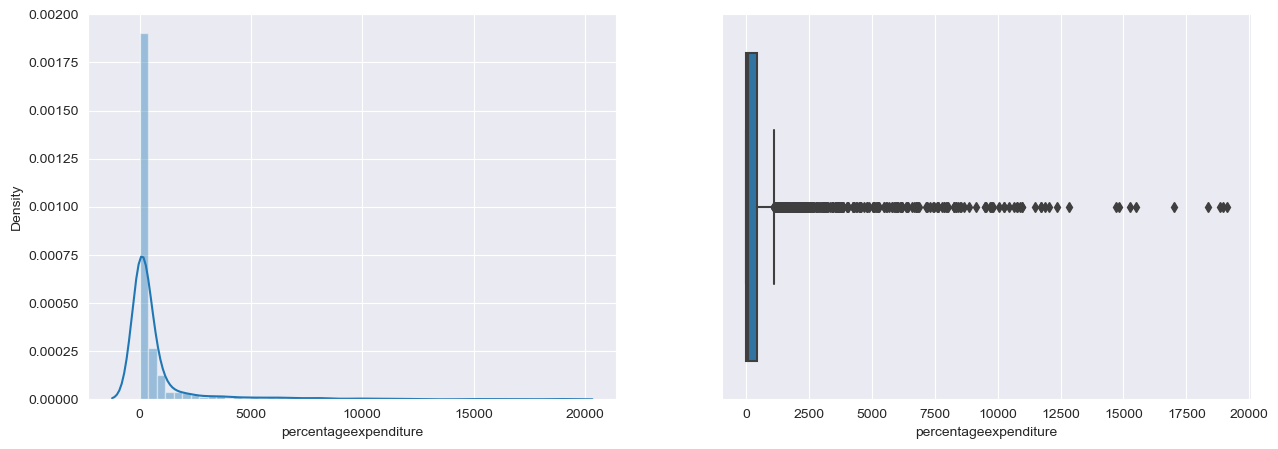

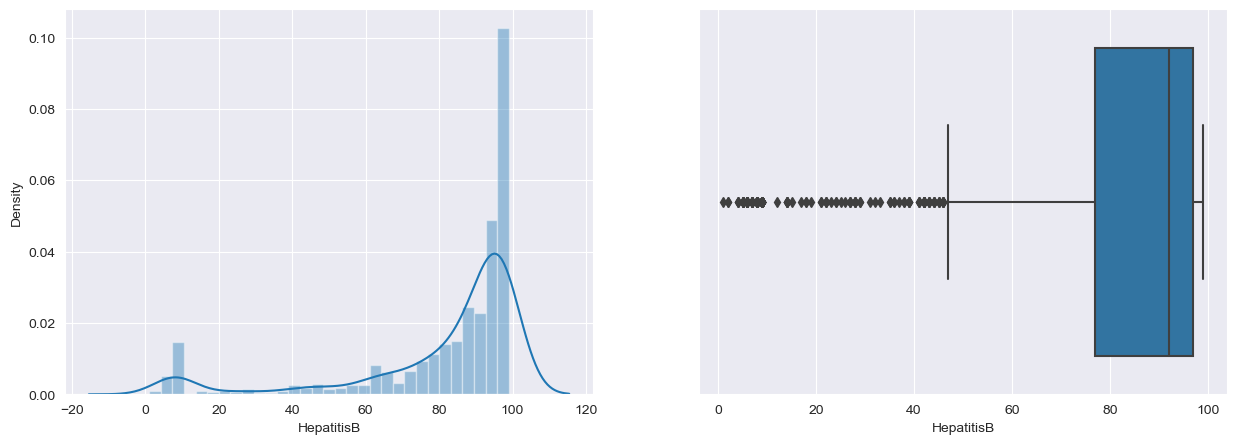

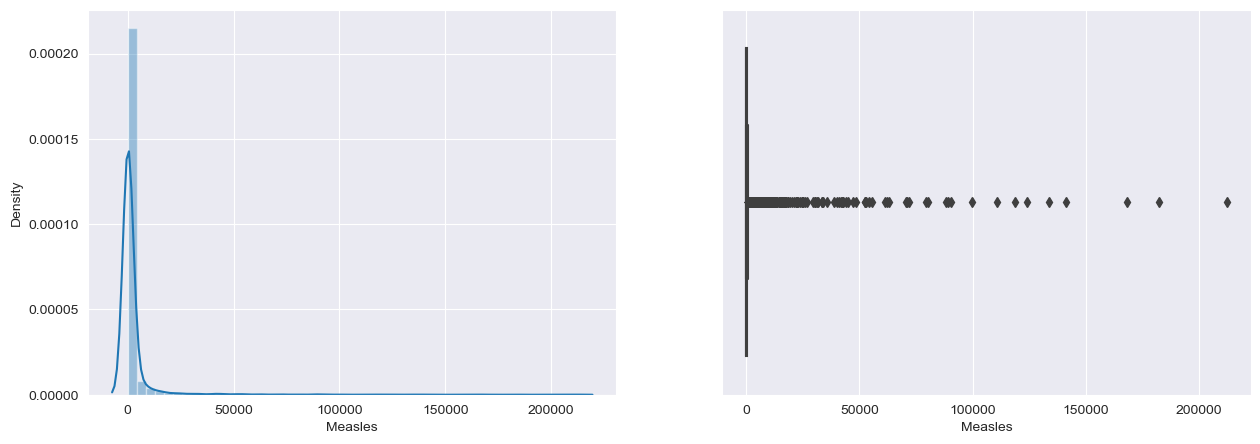

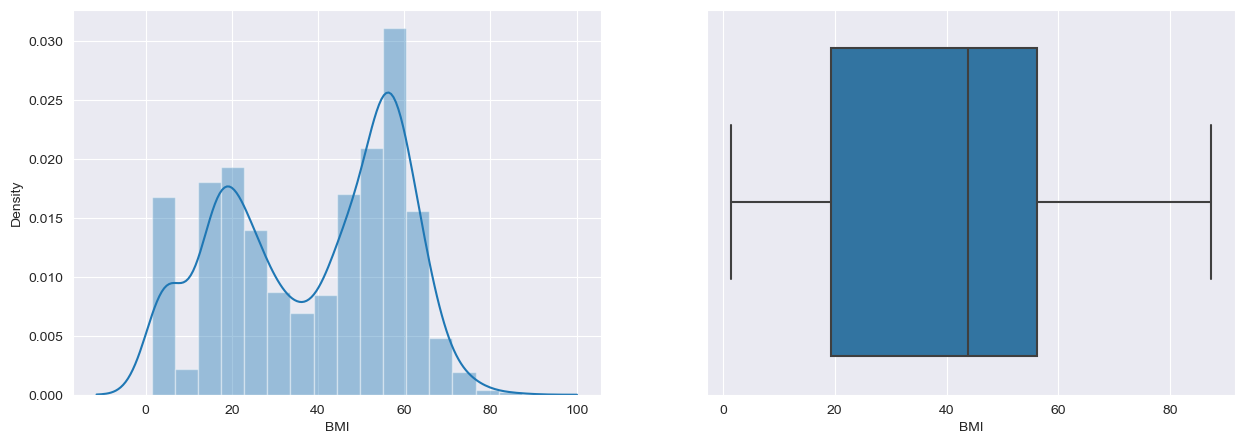

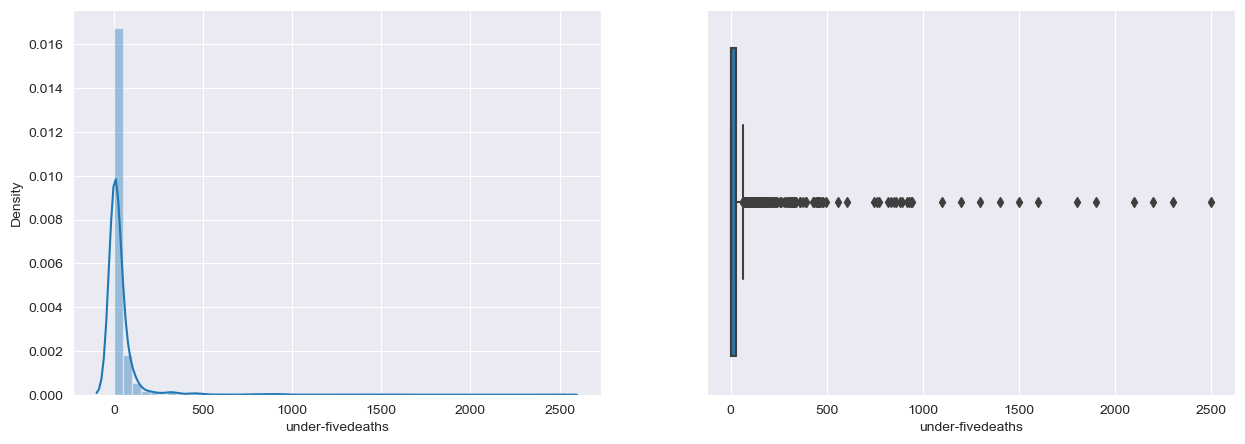

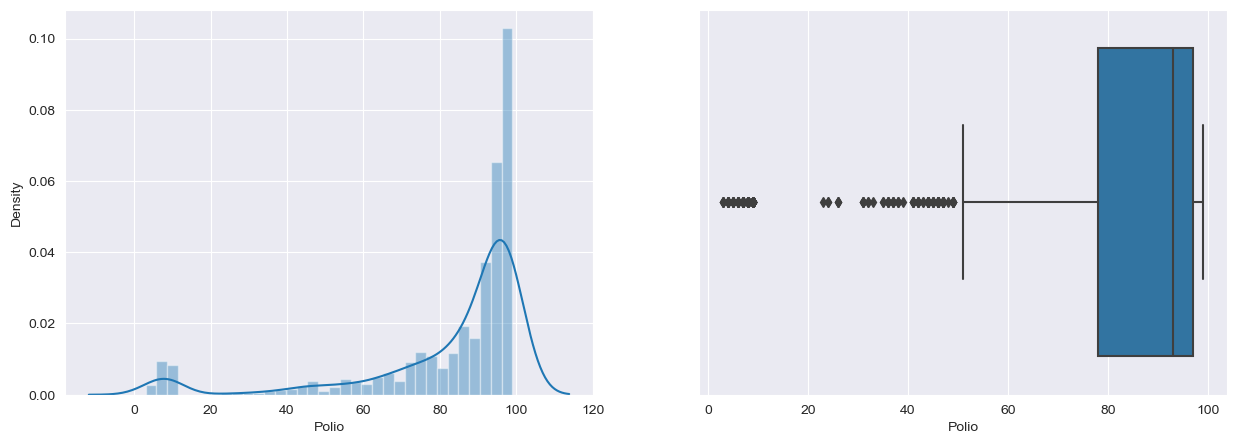

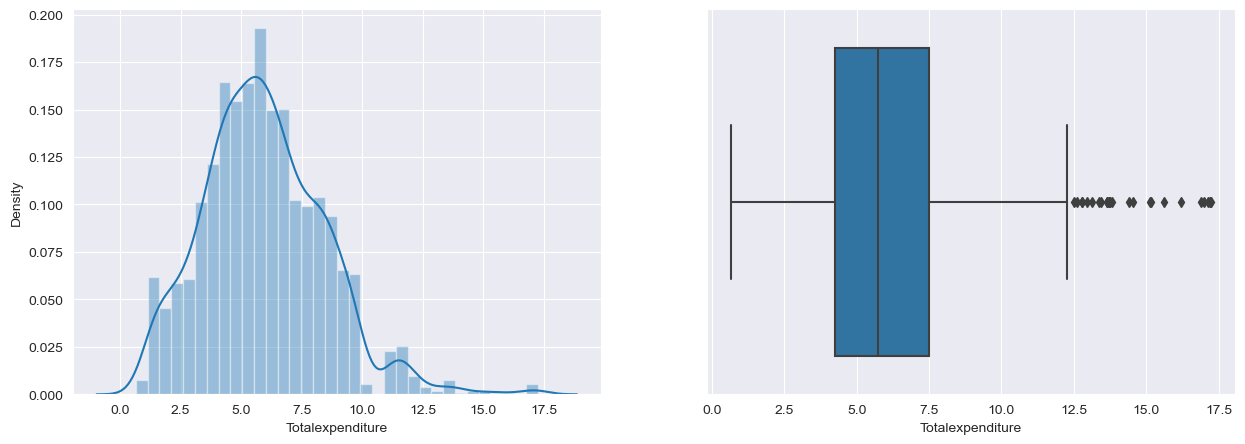

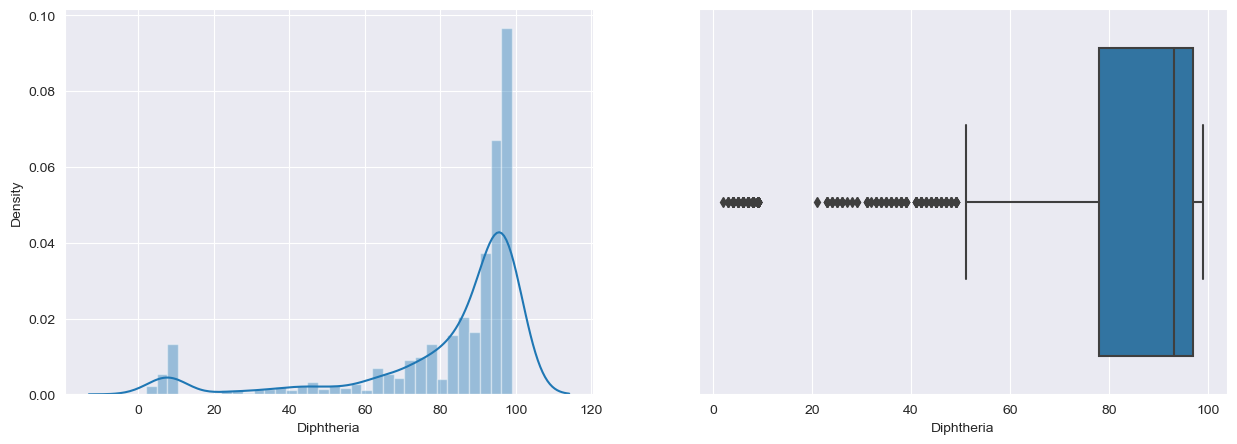

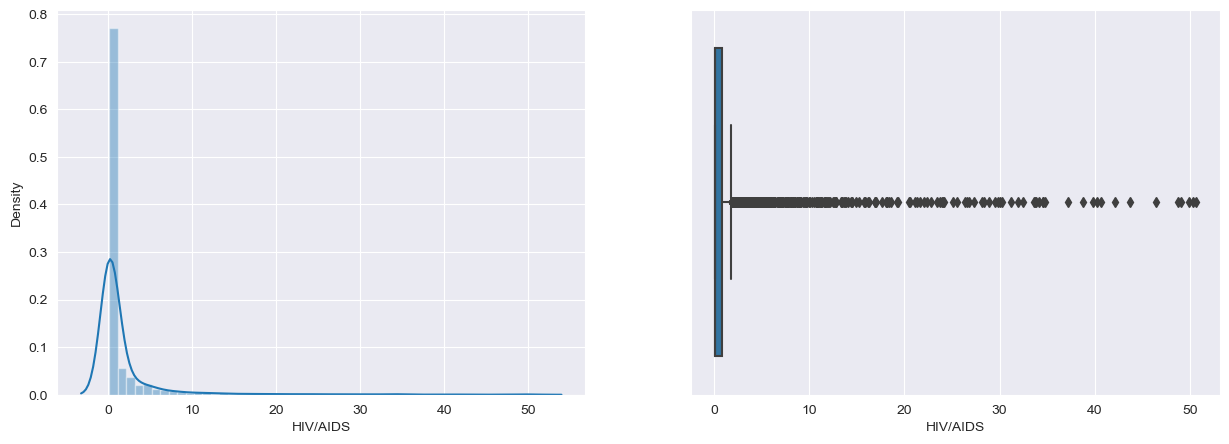

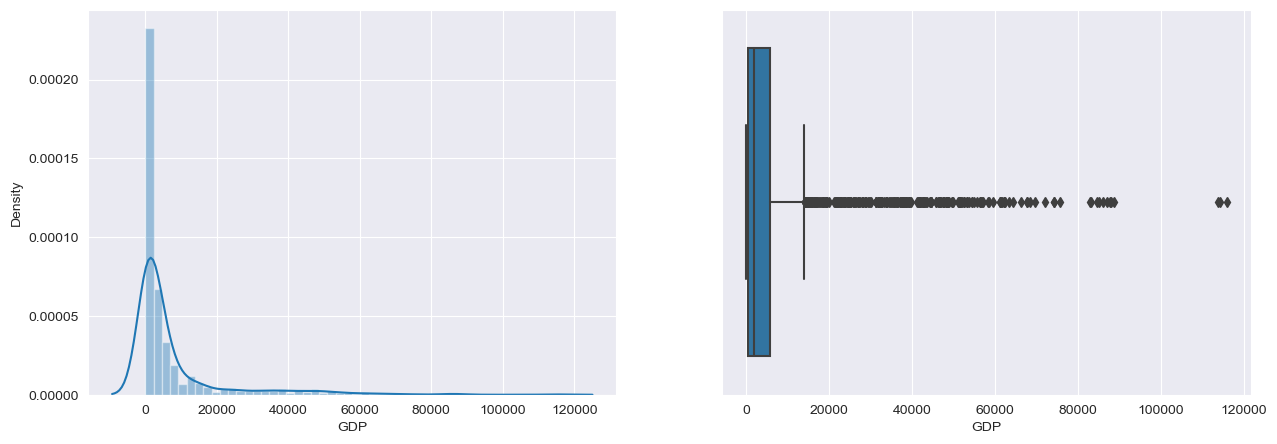

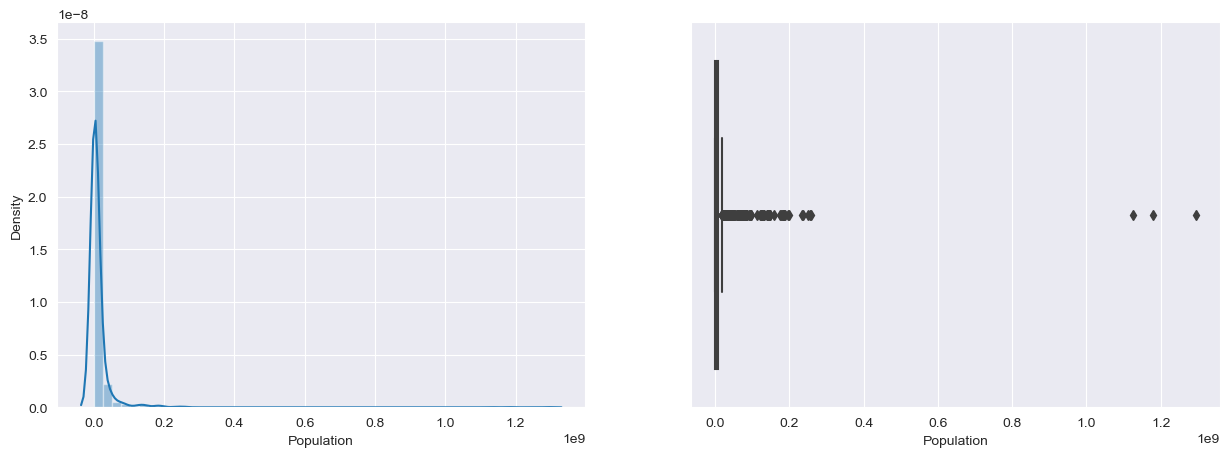

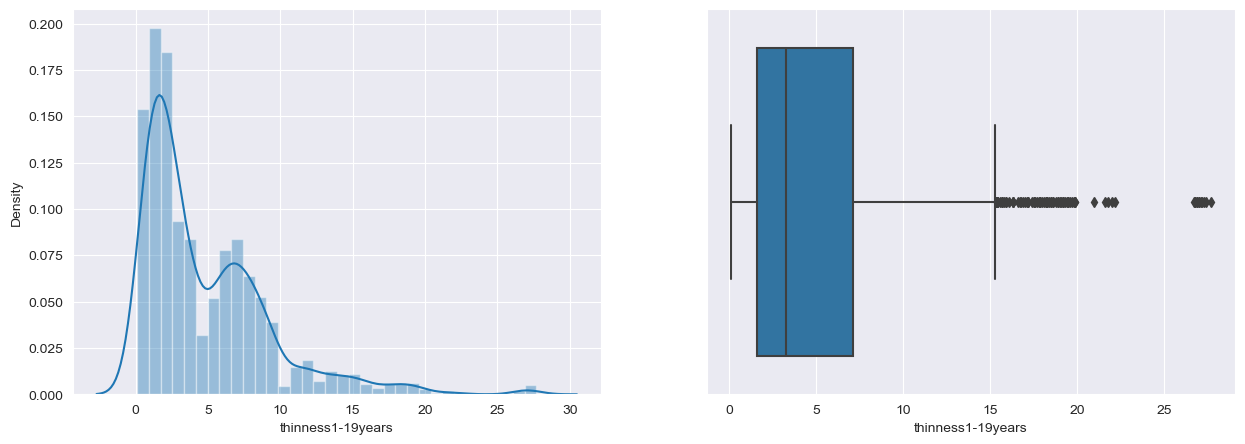

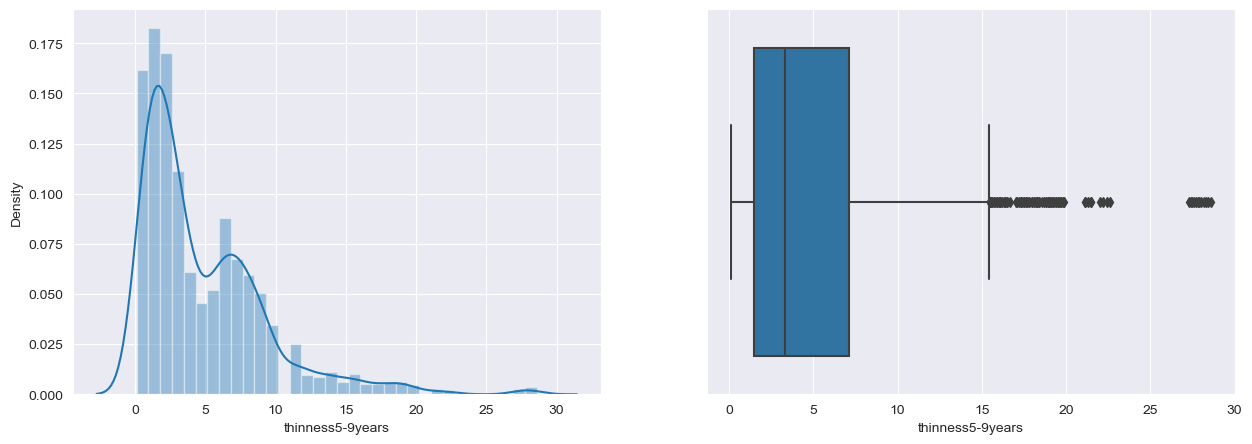

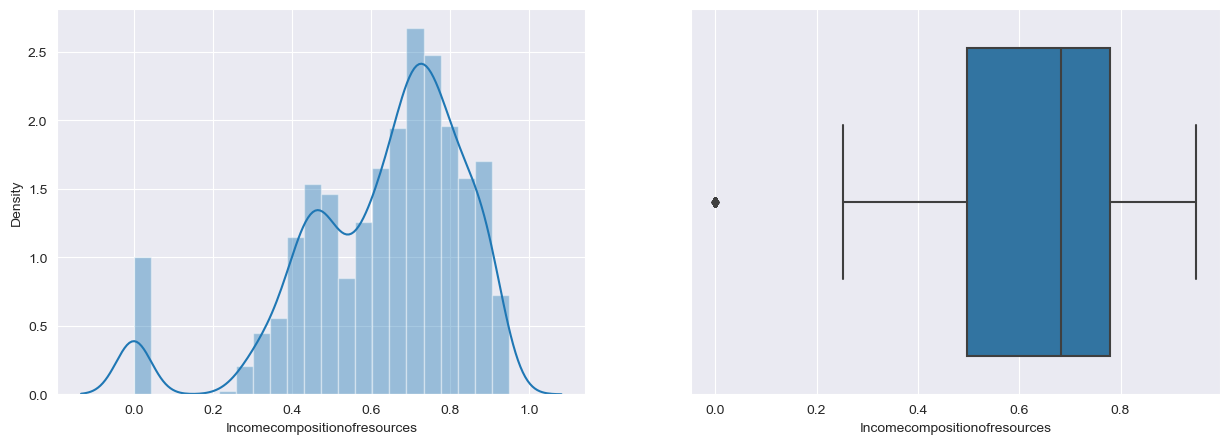

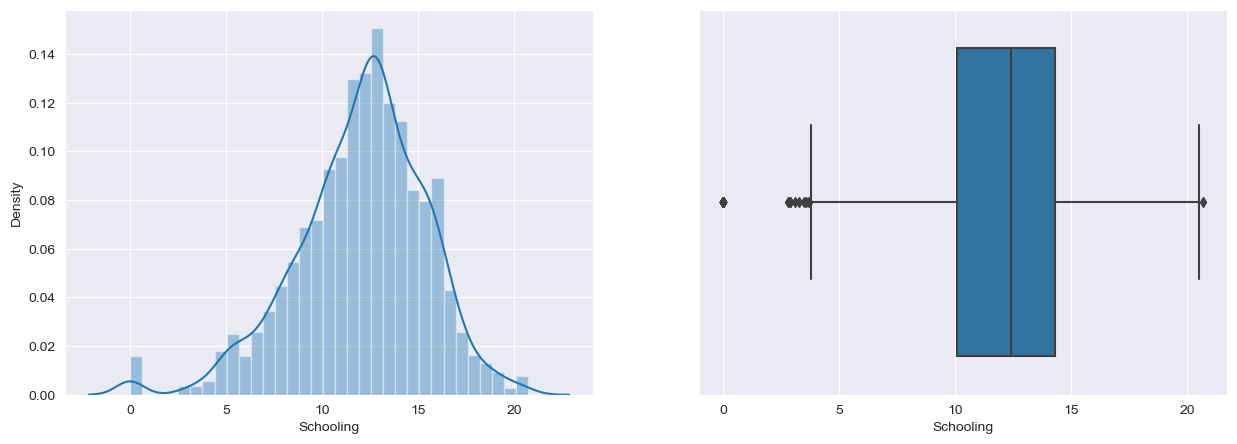

In [25]:
for col in df_train[num_col].drop(columns='Year').columns:
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    sns.distplot(df_train[col], ax=ax[0] )
    sns.boxplot(x=df_train[col], ax=ax[1] )

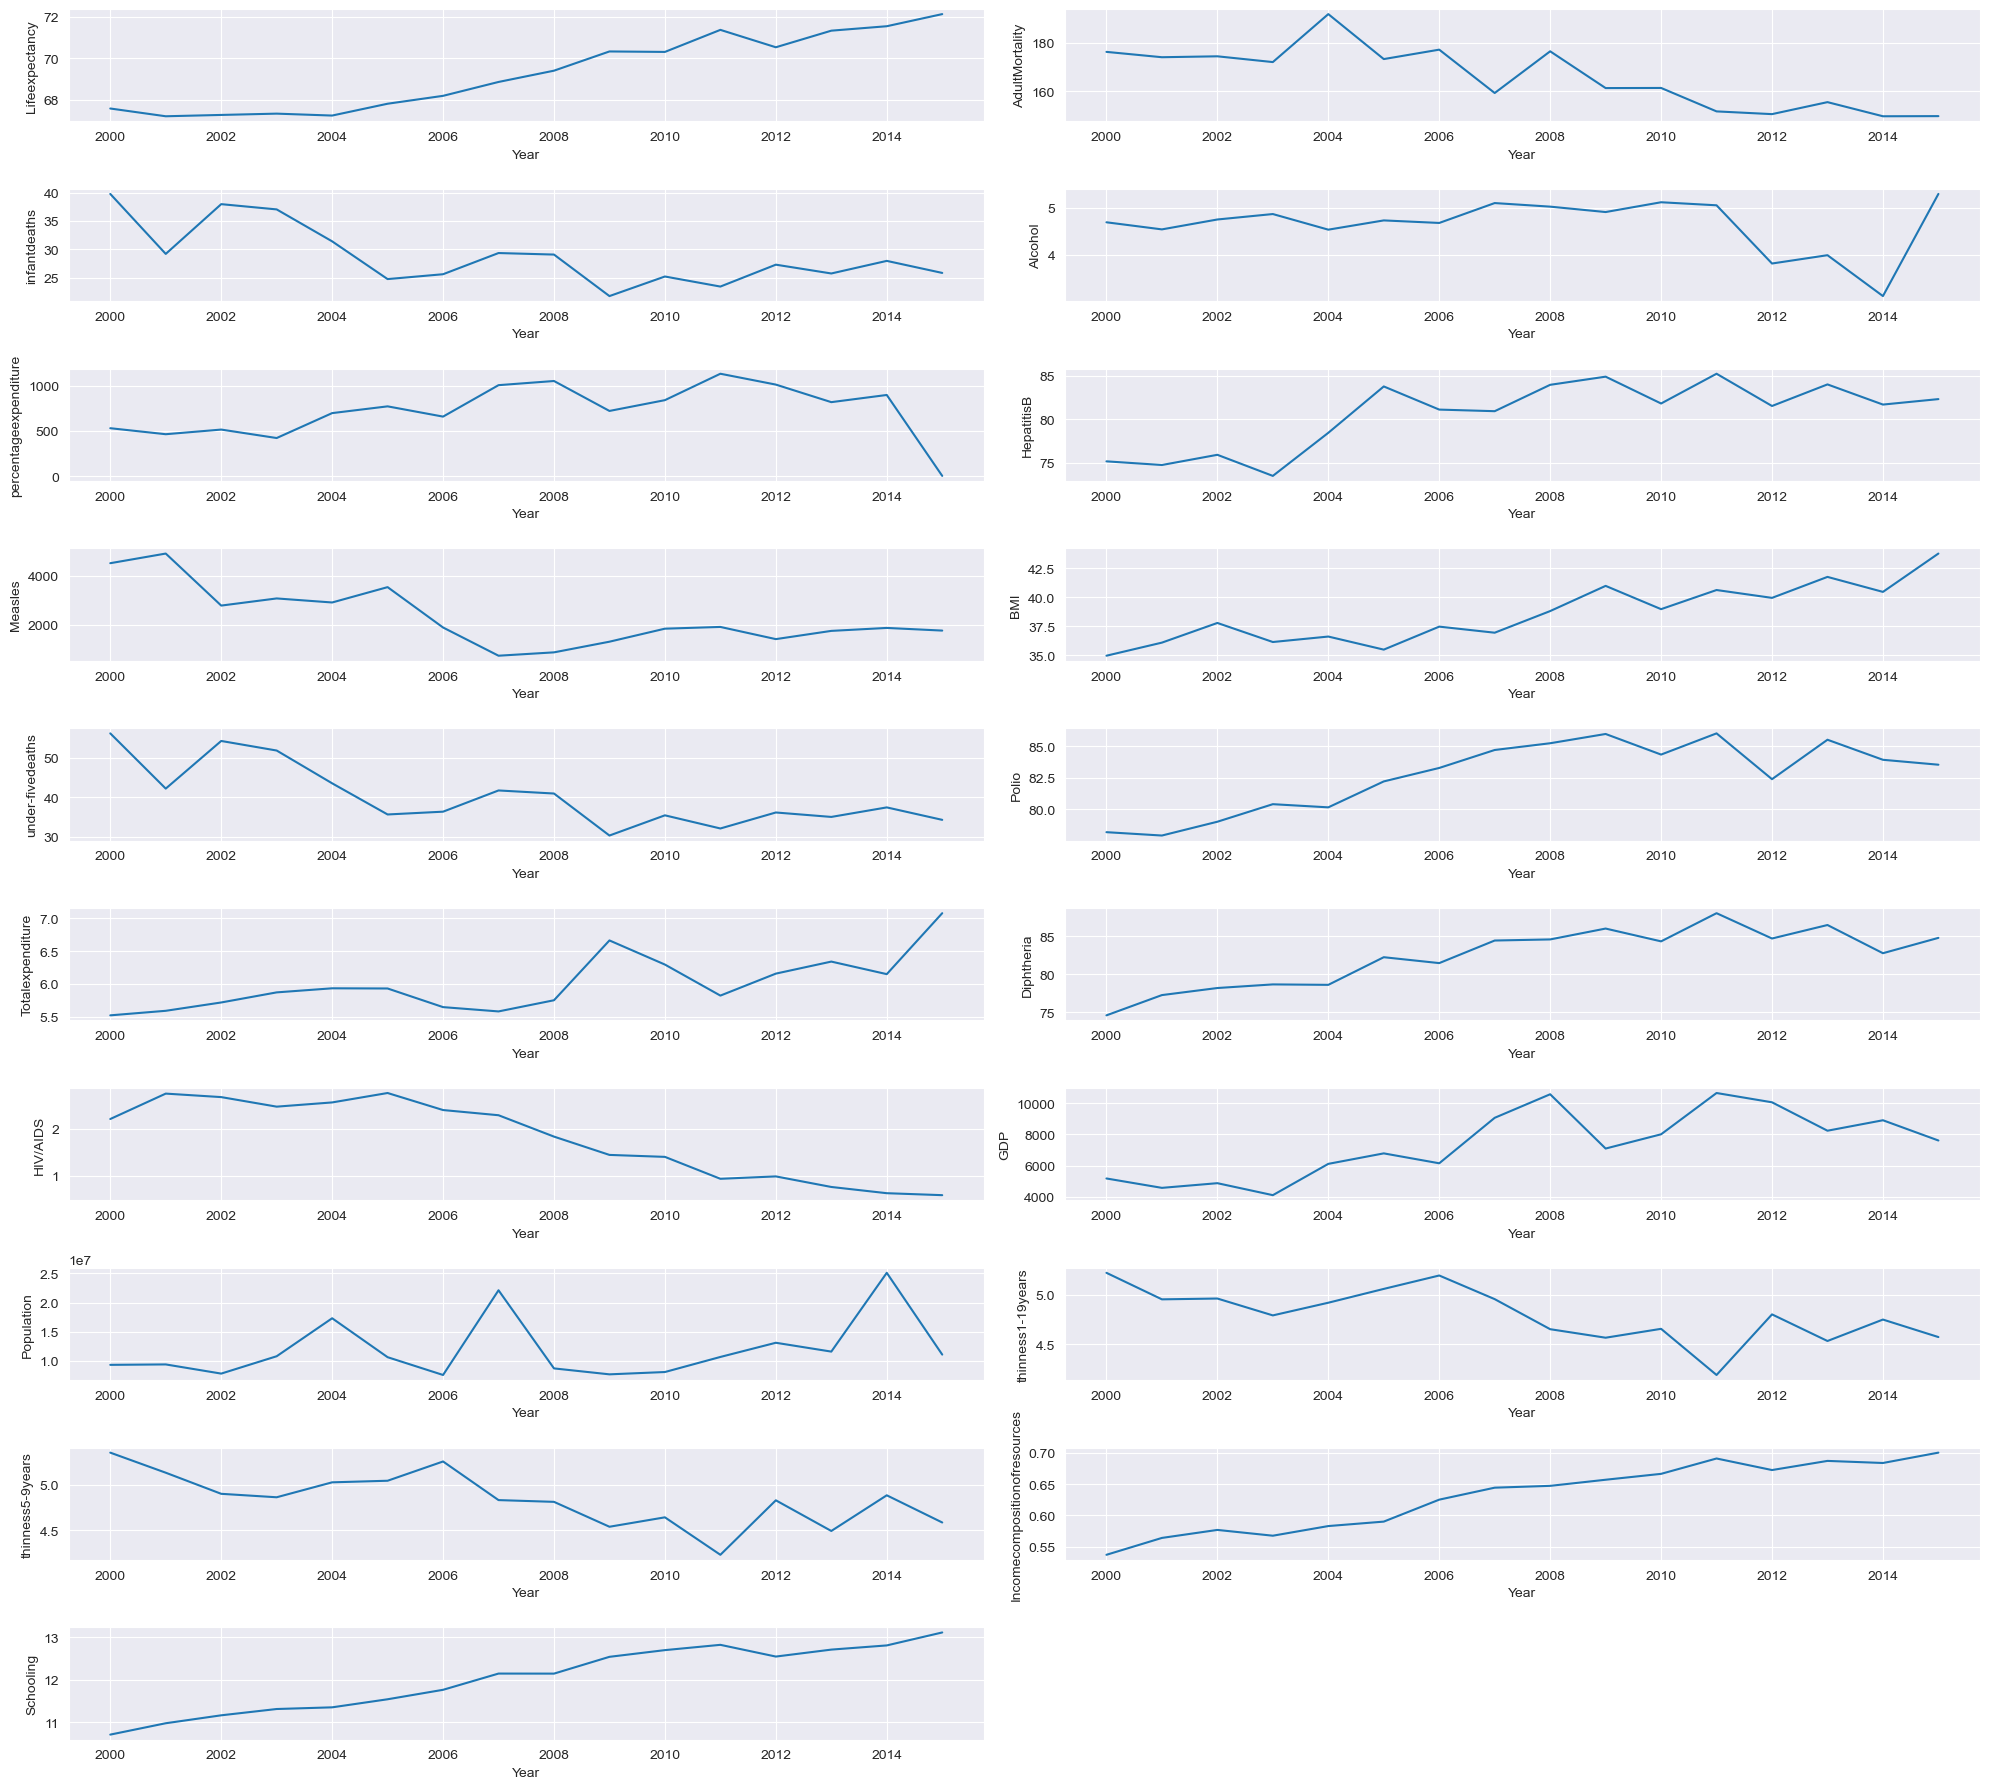

In [26]:
fig,axes=plt.subplots(nrows=len(df_train[num_col].columns)//2 ,ncols=2,figsize=(20,18))
for idx,col in enumerate(df_train[num_col].drop(columns='Year').columns):
    row_idx=idx//2
    col_idx=idx%2
    sns.lineplot(x='Year',y=df_train[col],data=df_train,ax=axes[row_idx,col_idx],markers=True,ci=None)
fig.delaxes(axes[9,1])
plt.tight_layout()
plt.show()


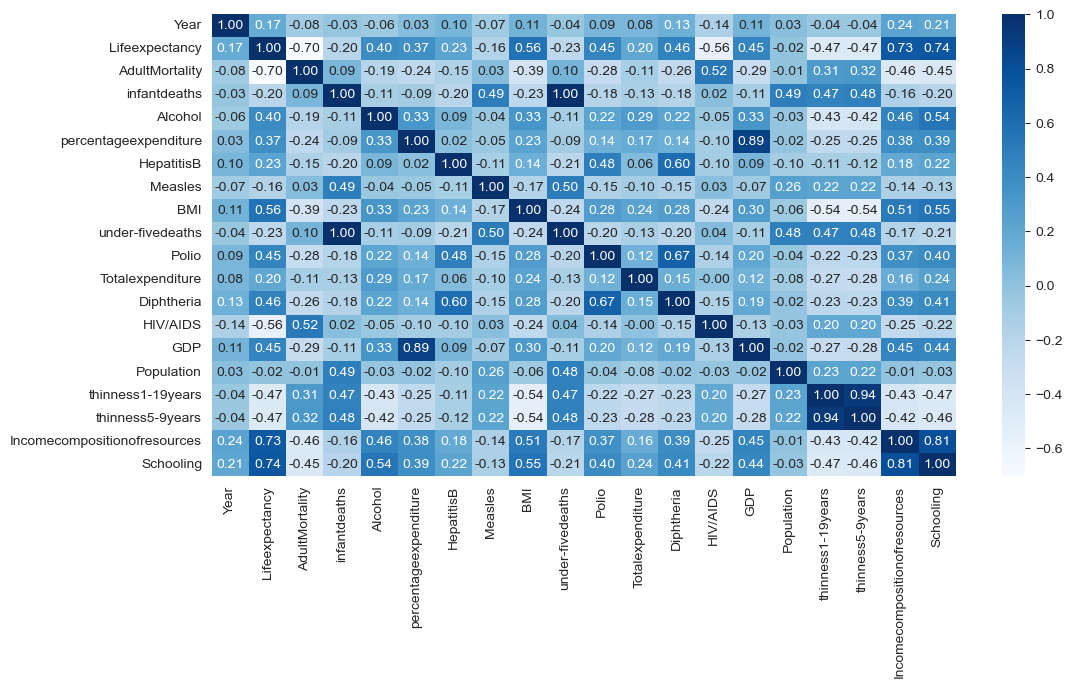

In [27]:
corr = df_train.corr()
mask = np.triu(corr)
mask=mask
plt.figure(figsize=(12, 6))
sns.heatmap(corr, annot=True, cmap='Blues', fmt='.2f')
plt.show()